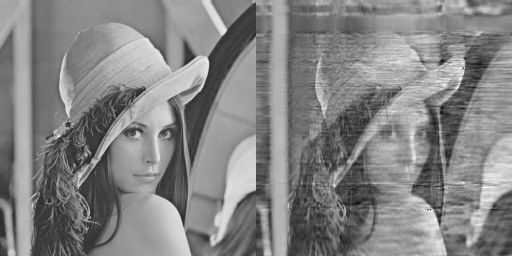

Reconstructed Image (Components: 64)


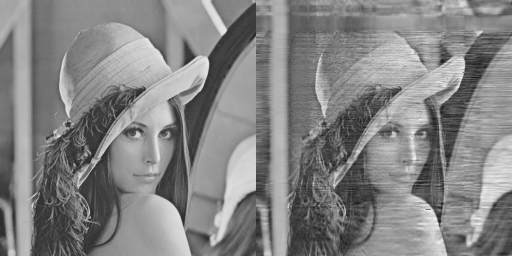

Reconstructed Image (Components: 128)


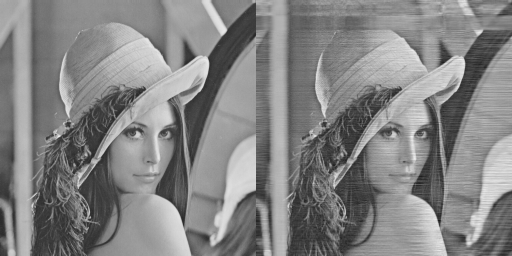

Reconstructed Image (Components: 256)


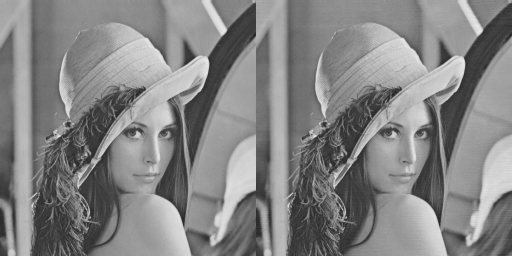

Reconstructed Image (Components: 512)


In [7]:
from google.colab.patches import cv2_imshow

import cv2
import numpy as np

imgpath = "PCA.png"
img = cv2.imread(imgpath, 0)

components = [64, 128, 256,512]

M = np.mean(img.T, axis=1)

C = img - M

V = np.cov(C.T)

values, vectors = np.linalg.eig(V)

p = np.size(vectors, axis=1)

idx = np.argsort(values)
idx = idx[::-1]

vectors = vectors[:, idx]
values = values[idx]

for num_pc in components:

    if num_pc < p or num_pc > 0:
        vectors_cut = vectors[:, range(num_pc)]

        score = np.dot(vectors_cut.T, C)
        constructed_img = np.dot(vectors_cut, score) + M
        constructed_img = np.uint8(np.absolute(constructed_img))

        output_img = np.hstack((img, constructed_img))

        scale_percent = 50
        width = int(output_img.shape[1] * scale_percent / 100)
        height = int(output_img.shape[0] * scale_percent / 100)
        output_img = cv2.resize(output_img, (width, height))

        cv2_imshow(output_img)
        print(f"Reconstructed Image (Components: {num_pc})")
        cv2.waitKey(0)

cv2.destroyAllWindows()
